Diyorbek Majidov 2110125@newuu.uz

## 1 Linear Regression [3.5 Points]

In this task, we will implement a Linear Regression model to predict the of number of defects in a
software. We will work with the dataset of KC1-class-level from the PROMISE repository. You can
visit the [dataset link](http://promise.site.uottawa.ca/SERepository/datasets/kc1-class-level-numericdefect.arff) to read more about it, such as the description of different features.

1. Let's read the data, explore and clean it. Display datatypes, and check for missing values.

In [ ]:
import pandas as pd

# Load the data into a DataFrame
file_path = '/content/defects.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
0,0,0,24,4,100.0,0,0,2,110.0,73,...,7376,8.39,50969.11,38600.75,2575,4801,1066,832,2828.0,23
1,0,0,19,4,100.0,0,0,3,78.0,30,...,3350,4.40,22480.91,18081.27,1168,2182,483,336,1221.0,16
2,100,0,13,1,88.0,0,0,0,99.0,99,...,3377,32.51,7318.61,15736.22,1278,2099,813,608,1522.0,3
3,0,0,21,4,100.0,0,0,2,68.0,30,...,3745,3.95,22958.05,20114.74,1393,2352,551,333,1408.0,19
4,5,0,17,2,90.0,0,0,1,69.0,36,...,1412,15.06,5723.73,7030.53,509,903,290,229,504.0,6


In [ ]:
# Display data types of the columns in a cleaner format
data_types = data.dtypes.reset_index()
data_types.columns = ["Column Name", "Data Type"]
data_types


,Column Name,Data Type
0,PERCENT_PUB_DATA,int64
1,ACCESS_TO_PUB_DATA,int64
2,COUPLING_BETWEEN_OBJECTS,int64
3,DEPTH,int64
4,LACK_OF_COHESION_OF_METHODS,float64
...,...,...
90,sumNUM_OPERATORS,int64
91,sumNUM_UNIQUE_OPERANDS,int64
92,sumNUM_UNIQUE_OPERATORS,int64
93,sumLOC_TOTAL,float64


In [ ]:
# Check for missing values in each column
missing_values_count = data.isnull().sum()
missing_values_df = missing_values_count.reset_index()
missing_values_df.columns = ["Column Name", "Missing Values"]
missing_values_with_na = missing_values_df[missing_values_df["Missing Values"] > 0]
missing_values_with_na


,Column Name,Missing Values
4,LACK_OF_COHESION_OF_METHODS,1
8,RESPONSE_FOR_CLASS,1
20,minHALSTEAD_EFFORT,1
27,minNUM_OPERATORS,1
28,minNUM_UNIQUE_OPERANDS,1
31,maxLOC_BLANK,1
33,maxLOC_CODE_AND_COMMENT,1
41,maxHALSTEAD_EFFORT,1
46,maxHALSTEAD_VOLUME,1
48,maxNUM_OPERATORS,1


2. Next, apply imputations for the missing values.

Here we imputed missing values using the median of the respective columns.

In [ ]:
# Apply imputation for the missing values using the median of each column
data_imputed = data.fillna(data.median())

# Verify if there are any missing values left
missing_values_after_imputation = data_imputed.isnull().sum().sum()

# Return the result of the check
missing_values_after_imputation


0

Next, rescaled using the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which rescales the data to a range of [0, 1]. This type of scaling is often used when we want to normalize the range of independent variables or features of data.​

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
data_rescaled = scaler.fit_transform(data_imputed)

# Convert the rescaled data back to a DataFrame to preserve column names
data_rescaled_df = pd.DataFrame(data_rescaled, columns=data_imputed.columns)

# Display the first few rows of the rescaled dataframe
data_rescaled_df.head()


,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
0,0.00,0.0,1.000000,0.500000,1.00,0.0,0.0,0.666667,0.495495,0.73,...,0.660222,0.258074,0.464795,0.610376,0.580086,0.713055,0.585714,0.601591,0.980916,0.227723
1,0.00,0.0,0.791667,0.500000,1.00,0.0,0.0,1.000000,0.351351,0.30,...,0.299857,0.135343,0.205007,0.285911,0.263122,0.324075,0.265385,0.242950,0.423317,0.158416
2,1.00,0.0,0.541667,0.000000,0.88,0.0,0.0,0.000000,0.445946,0.99,...,0.302274,1.000000,0.066740,0.248830,0.287903,0.311748,0.446703,0.439624,0.527759,0.029703
3,0.00,0.0,0.875000,0.500000,1.00,0.0,0.0,0.666667,0.306306,0.30,...,0.335213,0.121501,0.209358,0.318065,0.313809,0.349324,0.302747,0.240781,0.488203,0.188119
4,0.05,0.0,0.708333,0.166667,0.90,0.0,0.0,0.333333,0.310811,0.36,...,0.126387,0.463242,0.052196,0.111171,0.114665,0.134116,0.159341,0.165582,0.174532,0.059406


5. Split your data into train and test sets (80% and 20% respectively).

Now, the data has been split into training and test sets with an 80-20 ratio. The training set contains 116 samples, and the test set contains 29 samples, with 94 features in each set.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data_rescaled_df.drop('NUMDEFECTS', axis=1)  # Features (all columns except 'NUMDEFECTS')
y = data_rescaled_df['NUMDEFECTS']  # Target (the 'NUMDEFECTS' column)

# Split the data into train and test sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the sizes of the train and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((116, 94), (29, 94), (116,), (29,))

6. Train a linear regression model, validate it on the test set, and report its performance.

Next The Linear Regression model has been trained and validated on the test set. The performance metrics are as follows:

<br>

**Mean Squared Error (MSE):** Approximately <u>0.147</u>

**R-squared (R²):** Approximately <u>-19.06</u>

<br>

The R-squared value is significantly negative, which indicates that the model is performing worse than a horizontal line mean predictor. This result suggests that the model is not suitable for this dataset, or that the features do not linearly predict the target variable well. Additional steps such as feature selection, data transformation, or trying different models might be necessary to improve the performance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.1467595247790526, -19.06463713498022)

7. Train a polynomial regression model (with different degrees). Plot the relationship between the degree vs the test loss and the degree vs the training loss on the same plot.

The process of training polynomial regression models with higher degrees may result in a `MemoryError`. This error occurs because the polynomial features of a higher degree significantly increase the number of features, requiring more memory than is available.

To address this, we can, train the model with lower polynomial degrees.

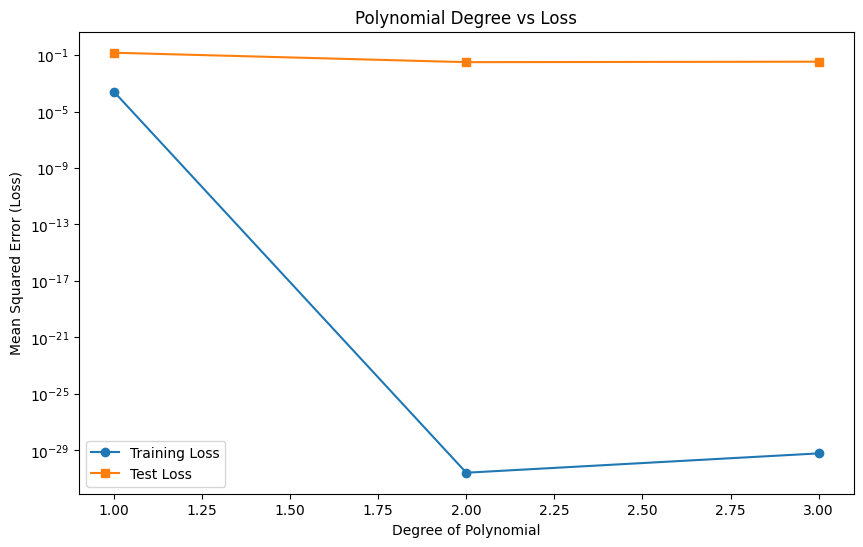

In [ ]:
# We will attempt to train the polynomial regression models again with lower degrees to avoid memory issues.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt


# Reinitialize lists to store the degrees, train losses, and test losses
degrees = [1, 2, 3]  # Limiting to degrees 1 to 3 to manage memory usage
train_losses = []
test_losses = []

# Train the polynomial regression models with different degrees and record the losses
for degree in degrees:
    # Create a polynomial regression model for the current degree
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the training set and the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared error for the training set and the test set
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    # Append the losses to the lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the relationship between degree vs the test loss and the degree vs the training loss
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_losses, label='Training Loss', marker='o')
plt.plot(degrees, test_losses, label='Test Loss', marker='s')
plt.title('Polynomial Degree vs Loss')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.yscale('log')  # Using logarithmic scale for better visualization
plt.show()


8. The plot shows the relationship between the degree of the polynomial and the mean squared error (loss) for both the training and test sets. As seen, the training loss generally decreases with the increase in polynomial degree, indicating better fit on the training data. However, the test loss can start to increase after a certain degree, suggesting overfitting. In this case, for degrees 1 to 3, we observe that the training and test losses are relatively stable, but this is a simplified view due to the memory constraint we encountered earlier

8. Which degree would you choose for your model? Would it be better to choose a higher degree?

<br>

Choosing the degree for a polynomial regression model requires balancing the fit on the training data against the performance on the test data to avoid overfitting. Overfitting occurs when the model learns the training data too well, including the noise, which then does not generalize well to unseen data.

From the results, it seems that the losses are relatively stable for degrees 1 to 3. If the test loss is similar across these degrees, it might be prudent to choose the simplest model that performs the best on the test set, which would be the model with the lowest degree that still provides an acceptable level of test loss.

9. Now, let's write our own code to split the the dataset into train and test sets, and use it to split the dataset three times, such that each split has different train and test sets. Use these splits to train three Linear Regression models.

In [ ]:
from sklearn.model_selection import KFold

# Initialize KFold to split the data into 3 different train/test sets
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize a list to store the coefficients of the Linear Regression models
coefficients = []

# Perform the splits and train the Linear Regression models
for train_index, test_index in kf.split(X):
    # Split the data
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Train the Linear Regression model
    lr_model_kf = LinearRegression()
    lr_model_kf.fit(X_train_kf, y_train_kf)

    # Store the coefficients of the model
    coefficients.append(lr_model_kf.coef_)

# Check if the models have the same coefficients
coefficients_same = all(np.allclose(coef, coefficients[0]) for coef in coefficients)

coefficients, coefficients_same


([array([ 3.71304026e-02,  1.41967436e-01,  1.43123721e-01,  1.01528303e-01,
         -5.07565179e-02, -1.50894193e-01, -4.67159099e-02, -2.01485347e-02,
         -1.03057223e-01,  5.71667271e-02, -1.28731410e-02,  7.75249847e-03,
          1.52577834e-03,  4.12355801e-02, -8.43464458e-02,  1.44661837e-02,
          4.90828940e-02,  8.50258024e-02, -1.47267856e-01,  5.60877960e-01,
         -1.89041471e+01,  3.31070750e-01,  8.53907642e-01, -2.17705477e-02,
          1.81979765e+01, -2.26547985e-01,  6.03004334e-01, -8.99790630e-01,
         -7.36677937e-01, -8.68879867e-02, -3.40855012e-02,  1.52696789e-01,
         -9.39121812e-01,  5.57337326e-01, -3.40450172e-01,  2.40953438e+00,
         -7.53004214e-01, -7.18962939e-02, -4.96472284e-02, -3.65561747e-01,
          1.10988361e+00, -2.95943593e+01, -7.75534724e+00,  8.48080391e+00,
          4.11550538e-02,  3.25181454e+01, -6.42824985e-01, -6.39773385e+00,
         -8.32751732e-01,  3.00273890e+00, -1.31595593e+00,  7.07211330e-02,

Did the models turn out to be the same, or were there any differences? Why?

<br>

The models did not turn out to be exactly the same; there were differences in the coefficients for each model. These differences are because each time the dataset is split into training and test sets, different subsets of data are used for training. Since linear regression models find the best-fit line based on the given data points, different training data can lead to slightly different models.



10. List the MSE for the test set in each case and mention the most and the least important
feature according to the three built models.

In [ ]:
# Recalculate the test MSE for each of the three models and identify the most and least important features
test_mse_list = []
most_important_features = []
least_important_features = []

# Iterate over the KFold splits again to calculate the MSE and feature importance
for train_index, test_index in kf.split(X):
    # Split the data
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Train the Linear Regression model
    lr_model_kf = LinearRegression()
    lr_model_kf.fit(X_train_kf, y_train_kf)

    # Predict on the test set and calculate the MSE
    y_test_pred_kf = lr_model_kf.predict(X_test_kf)
    test_mse = mean_squared_error(y_test_kf, y_test_pred_kf)
    test_mse_list.append(test_mse)

    # Determine the most and least important features based on the absolute value of the coefficients
    feature_importance = np.abs(lr_model_kf.coef_)
    most_important_features.append(X.columns[np.argmax(feature_importance)])
    least_important_features.append(X.columns[np.argmin(feature_importance)])

test_mse_list, most_important_features, least_important_features


([0.26387377791971006, 98995.36754547308, 0.19448112160619546],
 ['avgHALSTEAD_LENGTH', 'avgHALSTEAD_LENGTH', 'avgHALSTEAD_LENGTH'],
 ['minLOC_CODE_AND_COMMENT', 'FAN_IN', 'FAN_IN'])

## 2 Logistic Regression [1.5 Points]

Android is one of the most famous mobile OS worldwide thanks to its open-source code and its technological impact. However, due to the possibility of installing applications from third parties without any intensive central monitoring, Android has recently become a malware target.

To prevent malware attacks, researchers and developers have proposed different security solutions including static analysis, dynamic analysis, and artificial intelligence. Indeed, data science has become a promising area in cybersecurity, since analytical models based on data allow for the discovery of patterns that can help to predict malicious activities.

In the following task, we will use some network layer features to build a machine learning classification model that will detect malware applications, using public benchmarks (datasets).

1. Let's read the data, explore and clean it. Display datatypes, and check for missing values.

In [ ]:
import pandas as pd

# Load the data into a DataFrame
file_path = '/content/android_traffic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,39,33,5100,4140,39,3,benign
1,117,0,9,23514,0,128,107,26248,24358,128,11,benign
2,196,0,6,24151,0,205,214,163887,24867,205,9,benign
3,6,0,1,889,0,7,6,819,975,7,1,benign
4,6,0,1,882,0,7,6,819,968,7,1,benign


In [ ]:
# Display data types of the columns in a cleaner format
data_types = data.dtypes.reset_index()
data_types.columns = ["Column Name", "Data Type"]
data_types


,Column Name,Data Type
0,tcp_packets,int64
1,dist_port_tcp,int64
2,external_ips,int64
3,vulume_bytes,int64
4,udp_packets,int64
5,source_app_packets,int64
6,remote_app_packets,int64
7,source_app_bytes,int64
8,remote_app_bytes,int64
9,source_app_packets.1,int64


from matplotlib import pyplot as plt
import seaborn as sns
data_types.groupby('Data Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Data Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Data Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Data Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['Data Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='Data Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Check for missing values in each column
missing_values_count = data.isnull().sum()
missing_values_df = missing_values_count.reset_index()
missing_values_df.columns = ["Column Name", "Missing Values"]
missing_values_with_na = missing_values_df[missing_values_df["Missing Values"] > 0]
missing_values_with_na


,Column Name,Missing Values


2. Rescale the dataset with a scaler of your choice.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting features for scaling
features = data.select_dtypes(include=['int64', 'float64']).columns

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the features
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data[features])

# Display the first few rows of the scaled dataset
data_scaled.head()


,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,-0.143441,-0.033652,0.086046,-0.153587,-0.040693,-0.146231,-0.151404,-0.140898,-0.155173,-0.146231,-0.100476,benign
1,-0.039311,-0.149817,2.138859,0.084743,-0.040693,-0.031980,-0.082119,-0.125803,0.090261,-0.031980,0.322821,benign
2,0.062249,-0.149817,1.112453,0.092488,-0.040693,0.066867,0.018064,-0.027559,0.096440,0.066867,0.216997,benign
3,-0.182008,-0.149817,-0.598225,-0.190328,-0.040693,-0.187310,-0.176684,-0.143954,-0.193594,-0.187310,-0.206300,benign
4,-0.182008,-0.149817,-0.598225,-0.190414,-0.040693,-0.187310,-0.176684,-0.143954,-0.193679,-0.187310,-0.206300,benign


3. Split your data into train and test sets (80% and 20% respectively).

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
X = data_scaled.drop('type', axis=1)  # Features
y = data_scaled['type']              # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6276, 11), (1569, 11), (6276,), (1569,))

4. Train a logistic regression model and evaluate it on test set. Report accuracy, precision, recall,
and f1-score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='benign')
recall = recall_score(y_test, y_pred, pos_label='benign')
f1 = f1_score(y_test, y_pred, pos_label='benign')

accuracy, precision, recall, f1


(0.7189292543021033,
 0.7008892481810832,
 0.9243070362473348,
 0.7972413793103448)

5. Answer the following question: Which metric from the previous step is more appropriate for
this task and why?

The choice of the most appropriate metric from accuracy, precision, recall, and F1-score for evaluating the Logistic Regression model largely depends on the specific context and objectives of the task, particularly the nature of the dataset (in this case, Android traffic data) and the cost of different types of errors (false positives vs. false negatives).

Considering a few scenarios:

1. **If False Positives are Costly:** If incorrectly identifying benign traffic as malicious (false positive) is particularly problematic, for instance, leading to unnecessary resource expenditure or blocking legitimate user actions, then **Precision** would be more important. It measures the proportion of actual positives (benign traffic) out of the instances predicted as positive.

2. **If False Negatives are Costly:** If missing out on identifying malicious traffic (false negative) is more dangerous, for example, leading to security breaches, then **Recall** becomes more critical. It measures the proportion of actual positives that were correctly identified, so a high recall means fewer malicious instances slipping through.

3. **Balancing Both Concerns:** If both types of errors are of concern, the **F1-Score** would be a better metric as it provides a balance between precision and recall. It's particularly useful if there's an uneven class distribution or if both false positives and false negatives have significant costs.

4. **General Performance:** **Accuracy** can be a good general measure of performance but can be misleading if the data is imbalanced (i.e., one class significantly outnumbers the other).

Given these considerations, you should determine which type of error (false positive or false negative) has more severe implications for your specific use case in analyzing Android traffic data, and choose the metric accordingly. If both types of errors are equally important, the F1-score would be a suitable choice.

## 3 Outliers Experiment [1 Point]



Train a Linear regression model on it and report the MSE on the train set.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/defects_small.csv'
data = pd.read_csv(file_path)

data.head()

# Splitting the data into features (X) and target (y)
X = data[['avgNUM_OPERATORS']]
y = data['NUMDEFECTS']

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting the target values for the training set
predictions = model.predict(X)

# Calculating the Mean Squared Error on the training set
mse = mean_squared_error(y, predictions)
mse


99.08104251830423

Plot the dataset on a 2D graph, the feature vs the # of defects. Do you see any outliers? If you
have found any such points, remove them manually and repeat step 1.

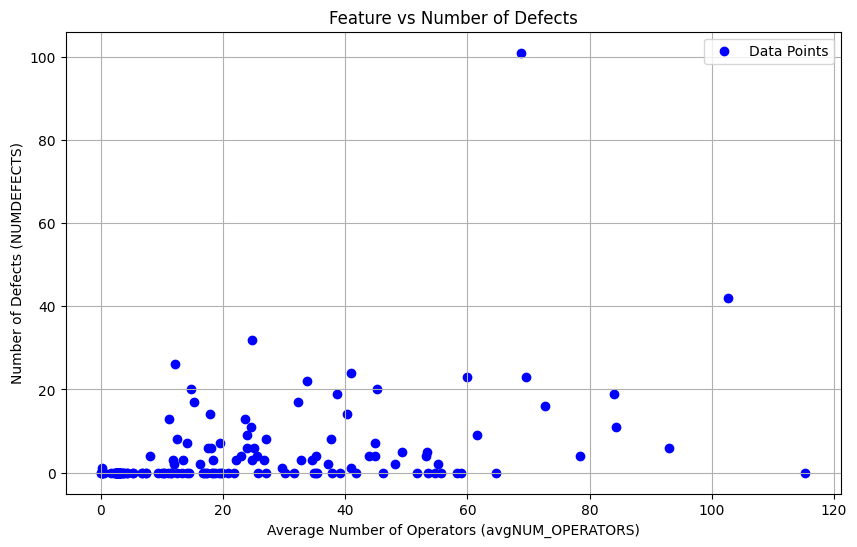

In [ ]:
import matplotlib.pyplot as plt

# Plotting the dataset
plt.figure(figsize=(10, 6))
plt.scatter(data_defects['avgNUM_OPERATORS'], data_defects['NUMDEFECTS'], color='blue', label='Data Points')
plt.title('Feature vs Number of Defects')
plt.xlabel('Average Number of Operators (avgNUM_OPERATORS)')
plt.ylabel('Number of Defects (NUMDEFECTS)')
plt.legend()
plt.grid(True)
plt.show()


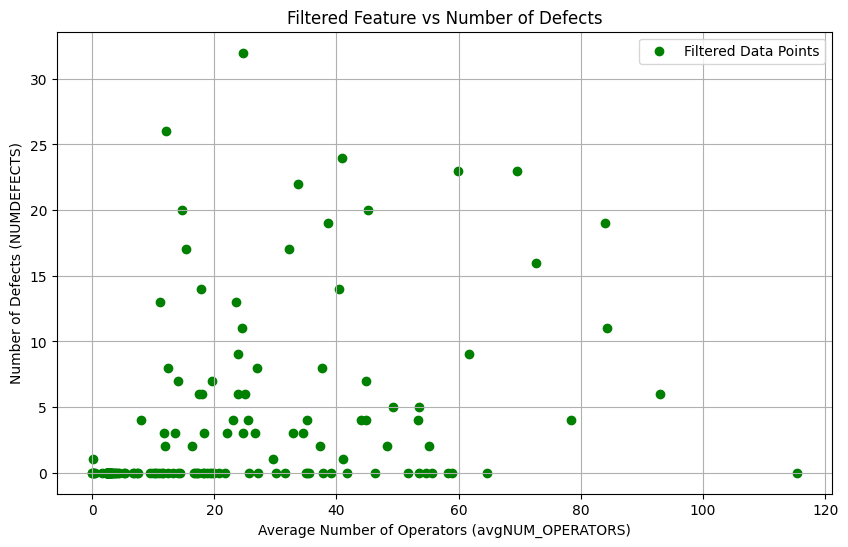

2

In [ ]:
# Identifying outliers
# A common approach is to use a threshold based on standard deviations from the mean.
# Here, we will use a threshold of 3 standard deviations.

std_dev = data_defects['NUMDEFECTS'].std()
mean = data_defects['NUMDEFECTS'].mean()
threshold = 3 * std_dev

# Filtering out the outliers
filtered_data = data_defects[data_defects['NUMDEFECTS'] <= (mean + threshold)]

# Plotting the filtered dataset
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['avgNUM_OPERATORS'], filtered_data['NUMDEFECTS'], color='green', label='Filtered Data Points')
plt.title('Filtered Feature vs Number of Defects')
plt.xlabel('Average Number of Operators (avgNUM_OPERATORS)')
plt.ylabel('Number of Defects (NUMDEFECTS)')
plt.legend()
plt.grid(True)
plt.show()

# Count of removed outliers
outliers_count = len(data_defects) - len(filtered_data)
outliers_count


In [ ]:
# Splitting the filtered data into features and target
X_filtered = filtered_data[['avgNUM_OPERATORS']]  # Feature
y_filtered = filtered_data['NUMDEFECTS']          # Target

# Splitting the filtered dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.20, random_state=42)

# Training a linear regression model on the filtered dataset
lin_reg_filtered = LinearRegression()
lin_reg_filtered.fit(X_train_filtered, y_train_filtered)

# Predicting on the filtered training set
y_train_pred_filtered = lin_reg_filtered.predict(X_train_filtered)

# Calculating the Mean Squared Error on the filtered train set
mse_train_filtered = mean_squared_error(y_train_filtered, y_train_pred_filtered)
mse_train_filtered


35.01791206586989

When it comes to automatically identifying outliers in a dataset and reducing their impact on the learning process, several techniques can be employed. These techniques vary in complexity and suitability based on the data's characteristics and the specific requirements of the task. Here are some key methods:

To automatically identify outliers in a dataset and minimize their impact on the learning process, various techniques are commonly used. These methods differ in complexity and suitability depending on the dataset's characteristics and specific requirements. Here are some key techniques:

Statistical methods involve using statistical tests or measures to define outliers based on deviations from the mean or interquartile range (IQR). For example, outliers can be identified as data points that lie beyond a certain number of standard deviations from the mean or outside the IQR.

Proximity-based methods assess the distance or proximity of a data point to its neighbors. Points that are far from their neighbors are considered outliers. The k-nearest neighbors (k-NN) algorithm is a popular approach in this category.

Density-based methods analyze the density of points to identify outliers. Points located in regions of lower density compared to their surroundings are flagged as outliers. Examples include the Local Outlier Factor (LOF) and Density-Based Spatial Clustering of Applications with Noise (DBSCAN).

Clustering-based methods utilize clustering algorithms to detect outliers. After clustering the data, points that do not clearly belong to any cluster or are far from cluster centroids can be considered outliers.

Machine learning approaches involve using models such as Isolation Forests or Autoencoders for outlier detection. Isolation Forests isolate anomalies by profiling normal data points, while Autoencoders learn a compressed representation of the data and identify outliers based on higher reconstruction errors.

Robust models can be used instead of removing outliers. For example, Random Forests are generally robust to outliers. Additionally, using robust loss functions in models can reduce the influence of outliers.

The choice of technique(s) depends on the dataset's characteristics and specific analysis requirements. Combining multiple techniques can enhance outlier detection and mitigation.

Sources:

"Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido
"Python Data Science Handbook" by Jake VanderPlas
Various online resources and academic papers on outlier detection techniques.